#Import Library

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import warnings
import time
from math import sqrt

warnings.filterwarnings(action='ignore')
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error, mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline

#Datasets

https://www.kaggle.com/datasets/deepcontractor/car-price-prediction-challenge?datasetId=2322277

Data Description
* ID : Primary key
* Price : Harga mobil (Kolom Target)
* Levy : Pajak impor dan ekspor mobil
* Manufacturer : Perusahaan yang membuat mobil
* Model : Tipe mobil
* Prod. year : Tahun pembuatan mobil
* Category : Jenis mobil
* Leather interior : Menggunakan kulit atau tidak
* Fuel type : Jenis bahan bakar
* Engine volume : Kapasitas mesin
* Mileage : Jarak yang sudah ditempuh
* Cylinders : Jumlah cilinder
* Gear box type : Jenis gear box
* Drive wheels : Sistem penggerak mobil
* Doors : Jumlah pintu
* Wheel : Letak stir kemudi
* Color : Warna mobil
* Airbags : Jumlah airbags

In [ ]:
data = pd.read_csv('car_price_prediction.csv')

In [ ]:
df = data.copy()
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

* Terdapat 18 kolom dan 19237 baris
* Kolom Levy masih berupa string dan terdapat noisy values '-'
* Kolom Mileage masih berupa string
* Kolom Doors adalah jumlah pintu di kendaraan akan tetapi terlihat seperti tanggal

#Data Cleaning

In [ ]:
#Check missing values
df.isna().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [ ]:
#Check duplicated values
df.duplicated().sum()

313

In [ ]:
#Drop duplicated
print('data shape sebelum drop duplikat:', df.shape)
df = df.drop_duplicates()
print('data shape sesudah drop duplikat:', df.shape)

data shape sebelum drop duplikat: (19237, 18)
data shape sesudah drop duplikat: (18924, 18)


* Tidak terdapat missing values
* Terdapat 313 data duplikat

##Cleaning the noisy values

In [ ]:
#Dapat kita Lihat kolom ID tidak berguna
df.drop('ID', axis=1, inplace=True)

In [ ]:
#Mengganti '-' dengan '0' dan di ubah menjadi dtype int
df['Levy'] = df['Levy'].replace(['-'],['0'])
df['Levy'] = df['Levy'].astype(str).astype(int)
df.Levy.value_counts()

0       5709
765      482
891      453
639      403
640      398
        ... 
3156       1
2908       1
1279       1
1719       1
1901       1
Name: Levy, Length: 559, dtype: int64

In [ ]:
df.Manufacturer.unique()

array(['LEXUS', 'CHEVROLET', 'HONDA', 'FORD', 'HYUNDAI', 'TOYOTA',
       'MERCEDES-BENZ', 'OPEL', 'PORSCHE', 'BMW', 'JEEP', 'VOLKSWAGEN',
       'AUDI', 'RENAULT', 'NISSAN', 'SUBARU', 'DAEWOO', 'KIA',
       'MITSUBISHI', 'SSANGYONG', 'MAZDA', 'GMC', 'FIAT', 'INFINITI',
       'ALFA ROMEO', 'SUZUKI', 'ACURA', 'LINCOLN', 'VAZ', 'GAZ',
       'CITROEN', 'LAND ROVER', 'MINI', 'DODGE', 'CHRYSLER', 'JAGUAR',
       'ISUZU', 'SKODA', 'DAIHATSU', 'BUICK', 'TESLA', 'CADILLAC',
       'PEUGEOT', 'BENTLEY', 'VOLVO', 'სხვა', 'HAVAL', 'HUMMER', 'SCION',
       'UAZ', 'MERCURY', 'ZAZ', 'ROVER', 'SEAT', 'LANCIA', 'MOSKVICH',
       'MASERATI', 'FERRARI', 'SAAB', 'LAMBORGHINI', 'ROLLS-ROYCE',
       'PONTIAC', 'SATURN', 'ASTON MARTIN', 'GREATWALL'], dtype=object)

In [ ]:
df['Manufacturer'].value_counts()

HYUNDAI          3729
TOYOTA           3606
MERCEDES-BENZ    2043
FORD             1088
CHEVROLET        1047
                 ... 
TESLA               1
PONTIAC             1
SATURN              1
ASTON MARTIN        1
GREATWALL           1
Name: Manufacturer, Length: 65, dtype: int64

In [ ]:
df['Engine volume'].unique()

array(['3.5', '3', '1.3', '2.5', '2', '1.8', '2.4', '4', '1.6', '3.3',
       '2.0 Turbo', '2.2 Turbo', '4.7', '1.5', '4.4', '3.0 Turbo',
       '1.4 Turbo', '3.6', '2.3', '1.5 Turbo', '1.6 Turbo', '2.2',
       '2.3 Turbo', '1.4', '5.5', '2.8 Turbo', '3.2', '3.8', '4.6', '1.2',
       '5', '1.7', '2.9', '0.5', '1.8 Turbo', '2.4 Turbo', '3.5 Turbo',
       '1.9', '2.7', '4.8', '5.3', '0.4', '2.8', '3.2 Turbo', '1.1',
       '2.1', '0.7', '5.4', '1.3 Turbo', '3.7', '1', '2.5 Turbo', '2.6',
       '1.9 Turbo', '4.4 Turbo', '4.7 Turbo', '0.8', '0.2 Turbo', '5.7',
       '4.8 Turbo', '4.6 Turbo', '6.7', '6.2', '1.2 Turbo', '3.4',
       '1.7 Turbo', '6.3 Turbo', '2.7 Turbo', '4.3', '4.2', '2.9 Turbo',
       '0', '4.0 Turbo', '20', '3.6 Turbo', '0.3', '3.7 Turbo', '5.9',
       '5.5 Turbo', '0.2', '2.1 Turbo', '5.6', '6', '0.7 Turbo',
       '0.6 Turbo', '6.8', '4.5', '0.6', '7.3', '0.1', '1.0 Turbo', '6.3',
       '4.5 Turbo', '0.8 Turbo', '4.2 Turbo', '3.1', '5.0 Turbo', '6.4',
       '3

In [ ]:
#Menghilangkan 'Turbo' dan di ubah menjadi dtype float
df['Engine volume']= df['Engine volume'].str.replace('Turbo','')
df['Engine volume']= df['Engine volume'].astype(str).astype(float)

In [ ]:
df['Engine volume'].unique()

array([ 3.5,  3. ,  1.3,  2.5,  2. ,  1.8,  2.4,  4. ,  1.6,  3.3,  2.2,
        4.7,  1.5,  4.4,  1.4,  3.6,  2.3,  5.5,  2.8,  3.2,  3.8,  4.6,
        1.2,  5. ,  1.7,  2.9,  0.5,  1.9,  2.7,  4.8,  5.3,  0.4,  1.1,
        2.1,  0.7,  5.4,  3.7,  1. ,  2.6,  0.8,  0.2,  5.7,  6.7,  6.2,
        3.4,  6.3,  4.3,  4.2,  0. , 20. ,  0.3,  5.9,  5.6,  6. ,  0.6,
        6.8,  4.5,  7.3,  0.1,  3.1,  6.4,  3.9,  0.9,  5.2,  5.8])

In [ ]:
df['Mileage']

0        186005 km
1        192000 km
2        200000 km
3        168966 km
4         91901 km
           ...    
19232    300000 km
19233    161600 km
19234    116365 km
19235     51258 km
19236    186923 km
Name: Mileage, Length: 18924, dtype: object

In [ ]:
#Menghapus km dan mengubahnya ke data type int
df['Mileage'] = df['Mileage'].apply(lambda x : str(x).replace('km',' '))
df['Mileage'] = df['Mileage'].astype(str).astype(int)

In [ ]:
df['Mileage']

0        186005
1        192000
2        200000
3        168966
4         91901
          ...  
19232    300000
19233    161600
19234    116365
19235     51258
19236    186923
Name: Mileage, Length: 18924, dtype: int64

In [ ]:
df['Doors'].unique()

array(['04-May', '02-Mar', '>5'], dtype=object)

In [ ]:
#Menghilangkan '-May' dan '-Mar' agar tidak seperti tanggal
df['Doors'] = df['Doors'].str.replace('04-May','4-5')
df['Doors'] = df['Doors'].str.replace('02-Mar','2-3')

In [ ]:
df['Doors'].unique()

array(['4-5', '2-3', '>5'], dtype=object)

#Data understanding

##Statistical summary

In [ ]:
categoricals = [feature for feature in df.columns if df[feature].dtype=='O']
numericals = [feature for feature in df.columns if df[feature].dtype!='O']
print(categoricals)
print(numericals)

['Manufacturer', 'Model', 'Category', 'Leather interior', 'Fuel type', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color']
['Price', 'Levy', 'Prod. year', 'Engine volume', 'Mileage', 'Cylinders', 'Airbags']


In [ ]:
df[numericals].describe()

,Price,Levy,Prod. year,Engine volume,Mileage,Cylinders,Airbags
count,1.892400e+04,18924.000000,18924.000000,18924.000000,1.892400e+04,18924.000000,18924.000000
mean,1.858744e+04,632.886493,2010.914236,2.306251,1.555373e+06,4.580216,6.568379
std,1.921356e+05,568.273736,5.665749,0.877591,4.880221e+07,1.200223,4.322323
min,1.000000e+00,0.000000,1939.000000,0.000000,0.000000e+00,1.000000,0.000000
25%,5.331000e+03,0.000000,2009.000000,1.800000,7.019575e+04,4.000000,4.000000
50%,1.317200e+04,642.000000,2012.000000,2.000000,1.264000e+05,4.000000,6.000000
75%,2.206300e+04,917.000000,2015.000000,2.500000,1.891198e+05,4.000000,12.000000
max,2.630750e+07,11714.000000,2020.000000,20.000000,2.147484e+09,16.000000,16.000000


Obsevasi:
* Semua kolom kecuali kolom Levy sepertinya mendapati positive skewed distribution karena nilai mean lebih besar dari nilai median

In [ ]:
df[categoricals].describe()

,Manufacturer,Model,Category,Leather interior,Fuel type,Gear box type,Drive wheels,Doors,Wheel,Color
count,18924,18924,18924,18924,18924,18924,18924,18924,18924,18924
unique,65,1590,11,2,7,4,3,3,2,16
top,HYUNDAI,Prius,Sedan,Yes,Petrol,Automatic,Front,4-5,Left wheel,Black
freq,3729,1069,8600,13731,9944,13282,12695,18032,17471,4944


In [ ]:
for col in categoricals:
  print(f"Value counts of {col} column")
  print(data[col].value_counts(), '\n')

Value counts of Manufacturer column
HYUNDAI          3769
TOYOTA           3662
MERCEDES-BENZ    2076
FORD             1111
CHEVROLET        1069
                 ... 
TESLA               1
PONTIAC             1
SATURN              1
ASTON MARTIN        1
GREATWALL           1
Name: Manufacturer, Length: 65, dtype: int64 

Value counts of Model column
Prius                    1083
Sonata                   1079
Camry                     938
Elantra                   922
E 350                     542
                         ... 
Feroza                      1
C-MAX C-MAX                 1
X1 4X4                      1
Land Cruiser Prado RX       1
Prius C aqua                1
Name: Model, Length: 1590, dtype: int64 

Value counts of Category column
Sedan          8736
Jeep           5473
Hatchback      2847
Minivan         647
Coupe           532
Universal       364
Microbus        306
Goods wagon     233
Pickup           52
Cabriolet        36
Limousine        11
Name: Category, dtype:

Kolom Manufacturer dan kolom Model memiliki banyak sekali kategori didalamnya. Untuk algoritma ML yang banyak kategori, tidak akan memberikan hasil yang baik. jadi, apakah kita harus menghapusnya atau mengubahnya menjadi fitur baru yang lebih sederhana

#Univariate Analysis

##Detect outliers

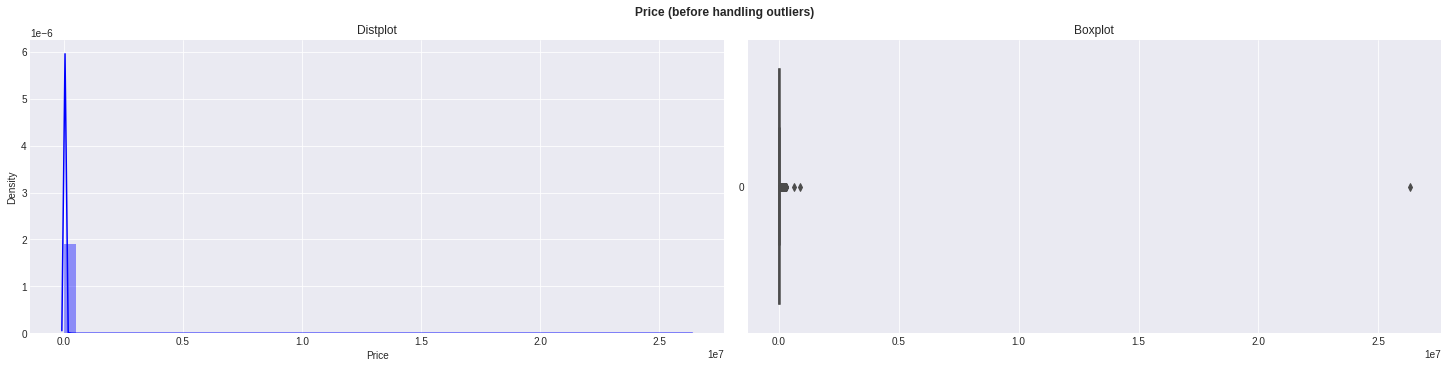

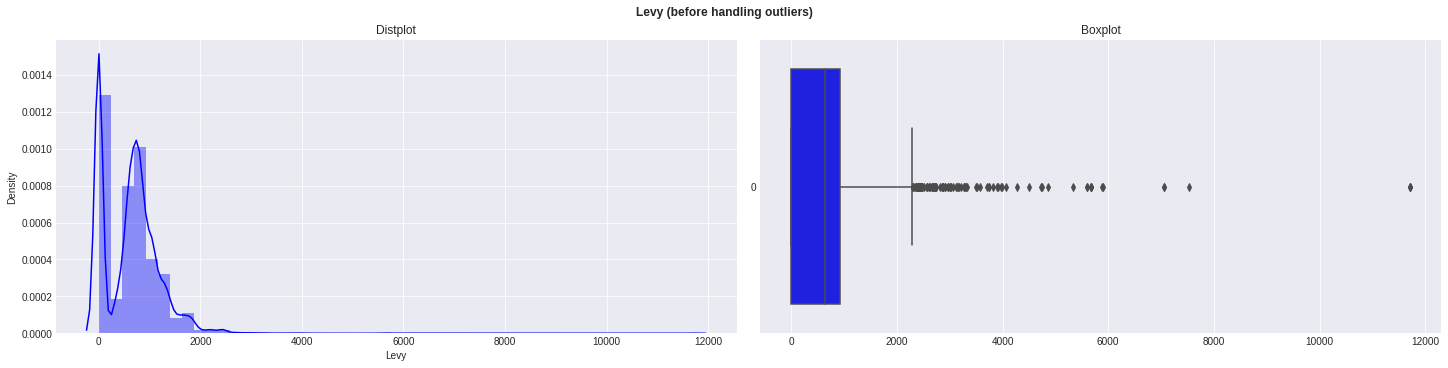

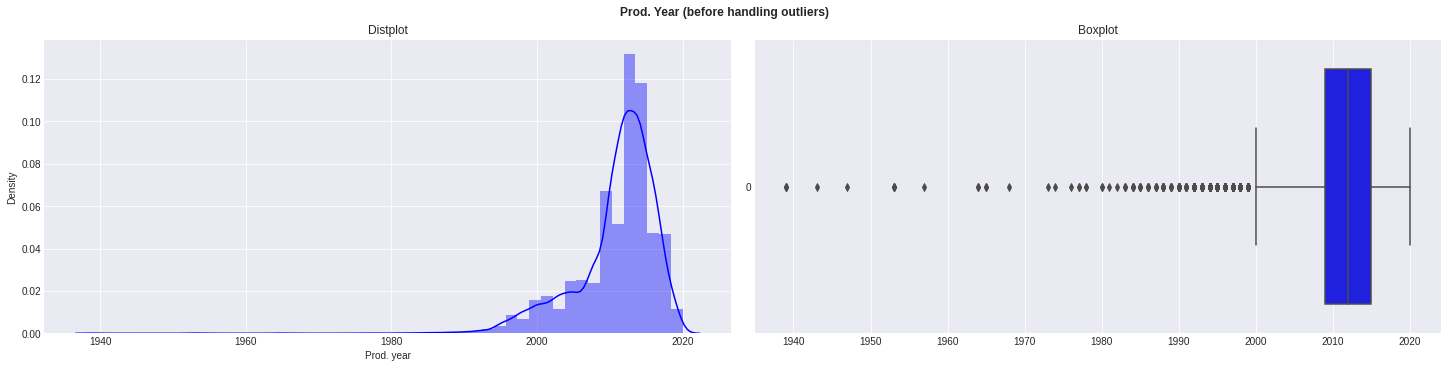

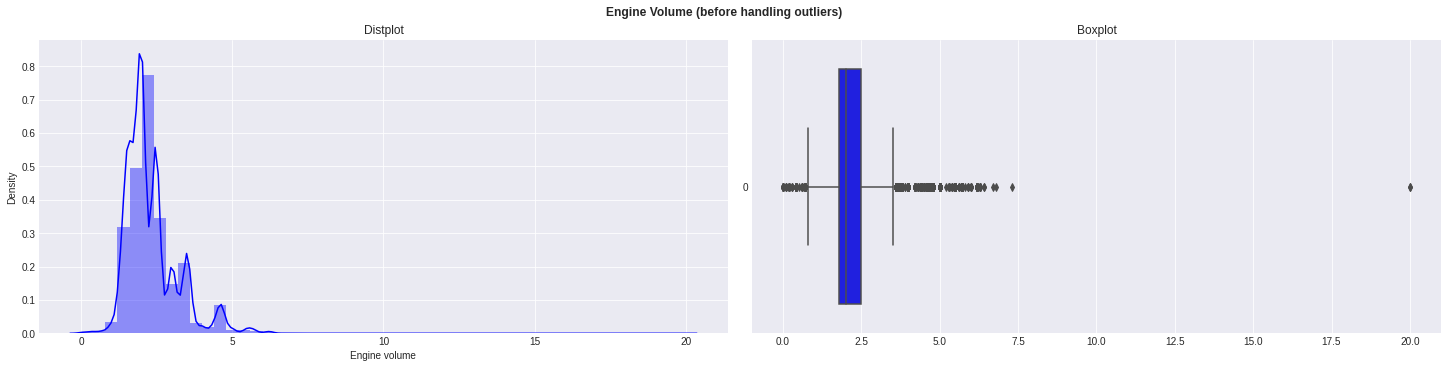

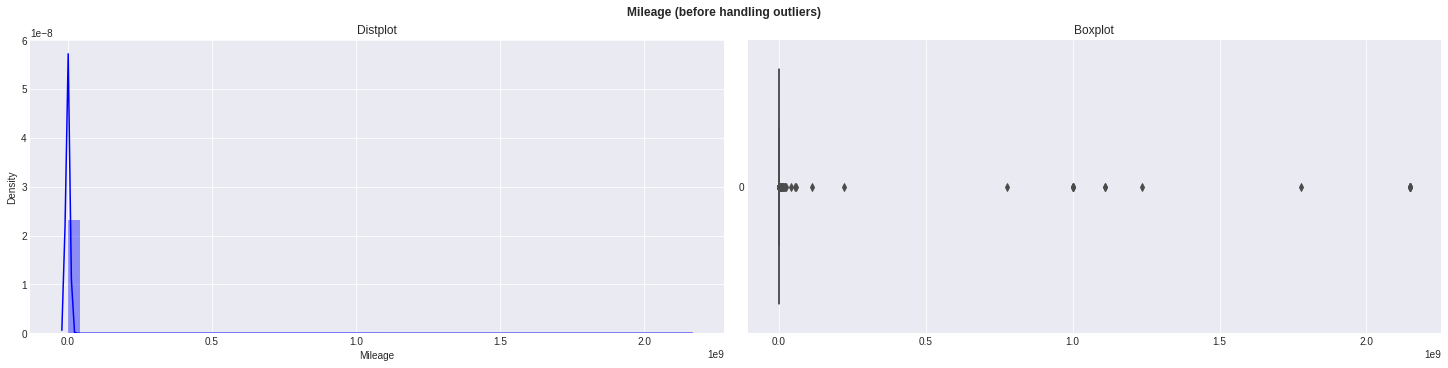

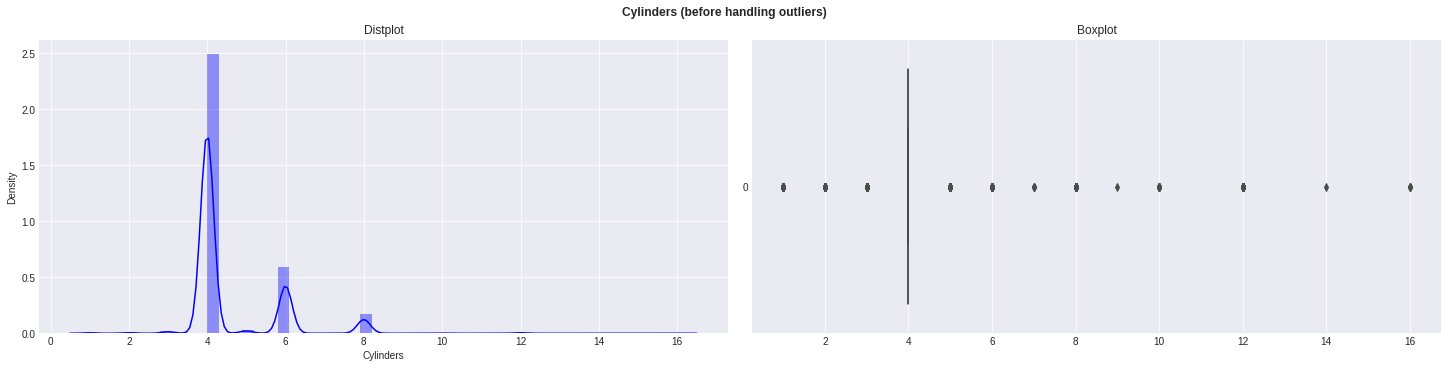

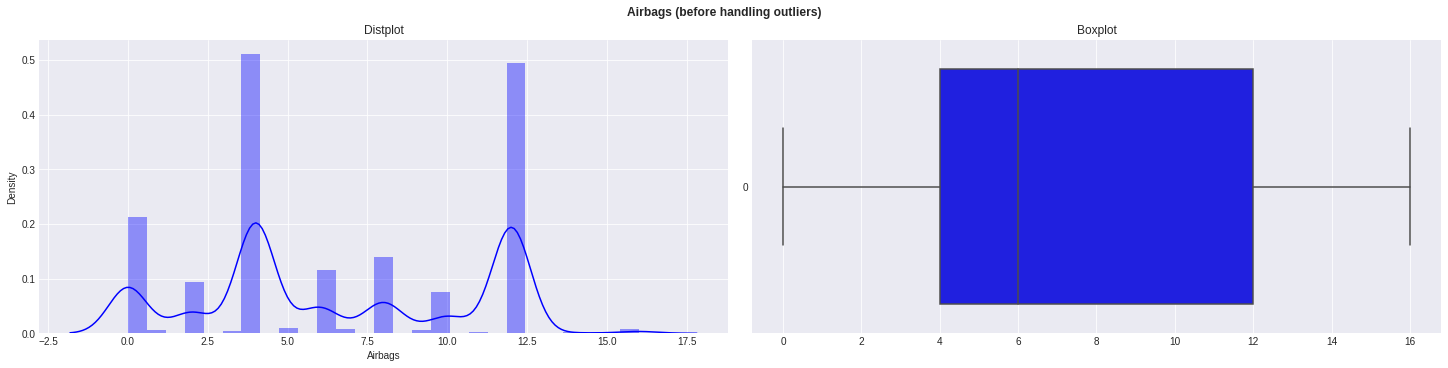

In [ ]:
for feature in numericals:
    fig, ax =plt.subplots(1,2, constrained_layout=True)
    fig.set_size_inches(20, 5)
    sns.distplot(df[feature], ax=ax[0],color='blue').set(title="Distplot")
    sns.boxplot(df[feature], ax=ax[1],color='blue',orient='h').set(title="Boxplot")
    plt.suptitle(f'{feature.title()} (before handling outliers)',weight='bold')
    fig.show()

observasi:
* Hanya kolom Airbags yang tidak terdapat outlier

In [ ]:
def outlier_prcnt(df, numericals_list):
    for numericals_name in numericals_list:
        q1 = df[numericals_name].quantile(0.25)
        q3 = df[numericals_name].quantile(0.75)
        iqr = q3-q1  #IQR
        fence_low  = q1-1.5*iqr
        fence_high = q3+1.5*iqr

        
        outliers = ((df[numericals_name] > fence_high) | (df[numericals_name] < fence_low)).sum()
        total = df[numericals_name].shape[0]
        print(f"Total outliers in {numericals_name} are: {outliers} - {round(100*(outliers)/total,2)}%.")

outlier_prcnt(df, numericals)

Total outliers in Price are: 1055 - 5.57%.
Total outliers in Levy are: 160 - 0.85%.
Total outliers in Prod. year are: 962 - 5.08%.
Total outliers in Engine volume are: 1358 - 7.18%.
Total outliers in Mileage are: 635 - 3.36%.
Total outliers in Cylinders are: 4765 - 25.18%.
Total outliers in Airbags are: 0 - 0.0%.


In [ ]:
def outlier_handle(df, numericals_list):
    df_new = df.copy()
    for numericals_name in numericals_list:
        q1 = df[numericals_name].quantile(0.25)
        q3 = df[numericals_name].quantile(0.75)
        iqr = q3-q1  #IQR
        fence_low  = q1-1.5*iqr
        fence_high = q3+1.5*iqr
        df_new.loc[:,  numericals_name] = np.where(df[numericals_name]> fence_high, fence_high,
                                         np.where(df[numericals_name]< fence_low, fence_low,
                                                  df[numericals_name]))
    return df_new
df = outlier_handle(df, numericals)

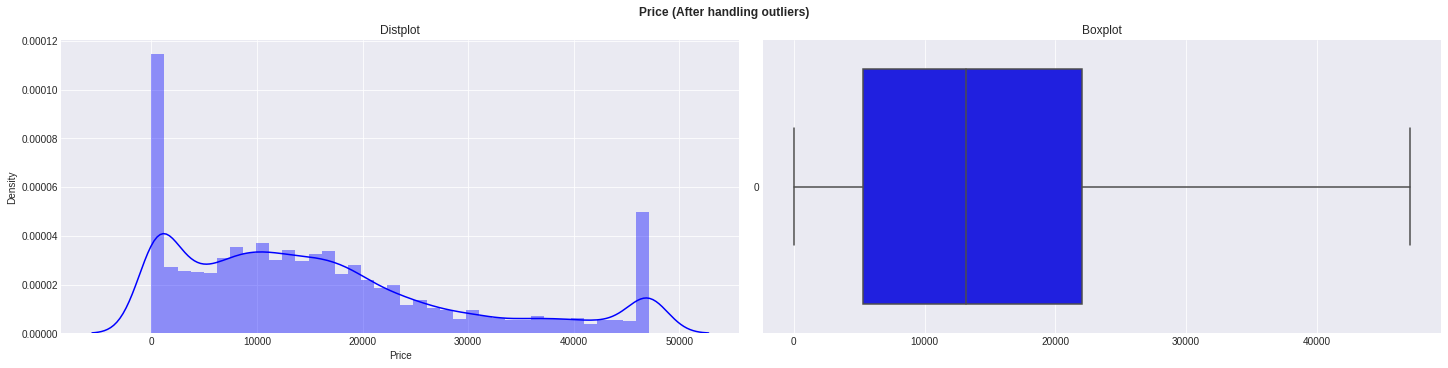

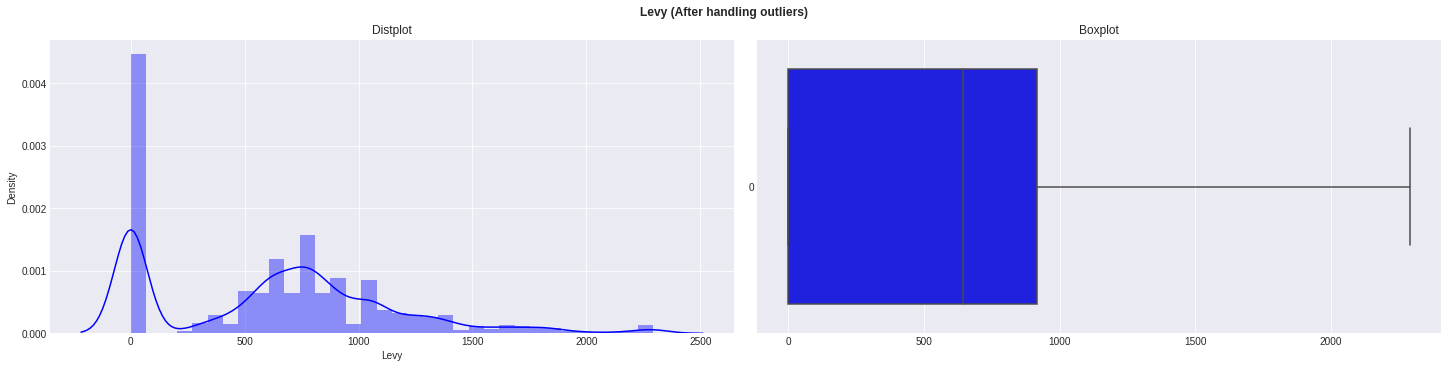

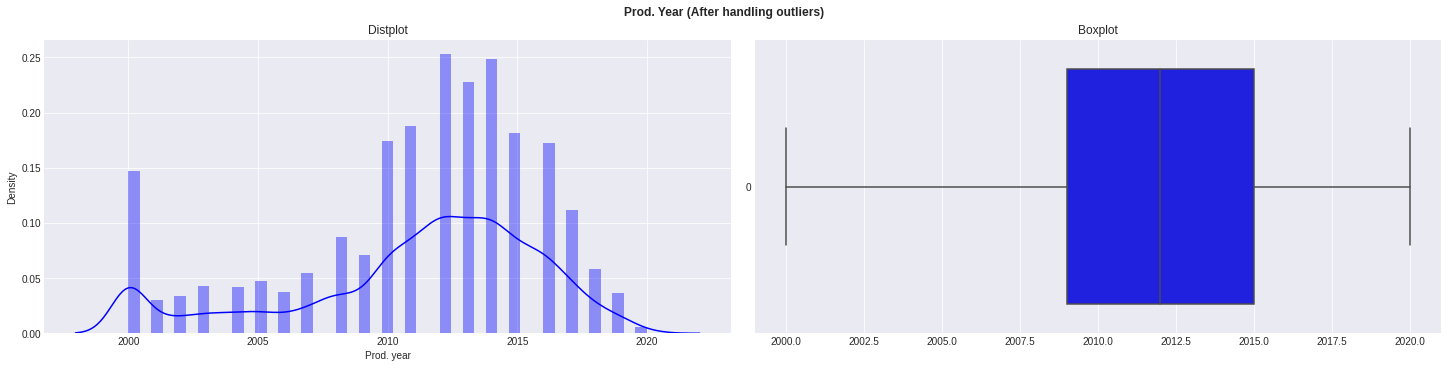

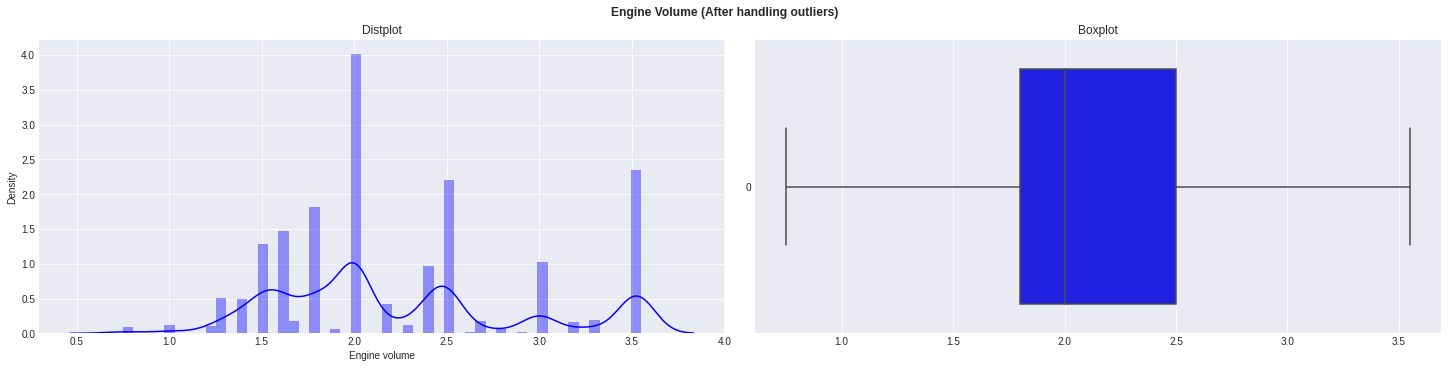

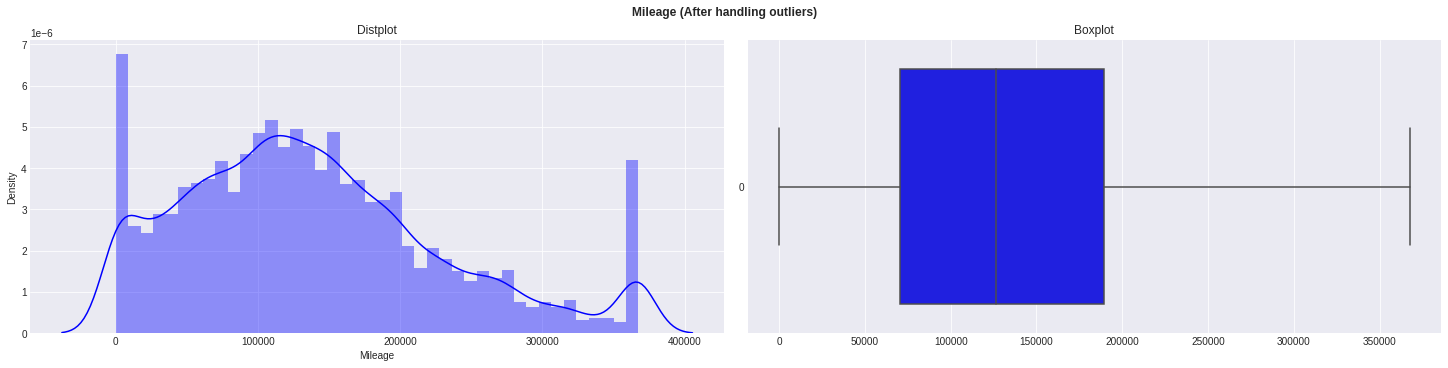

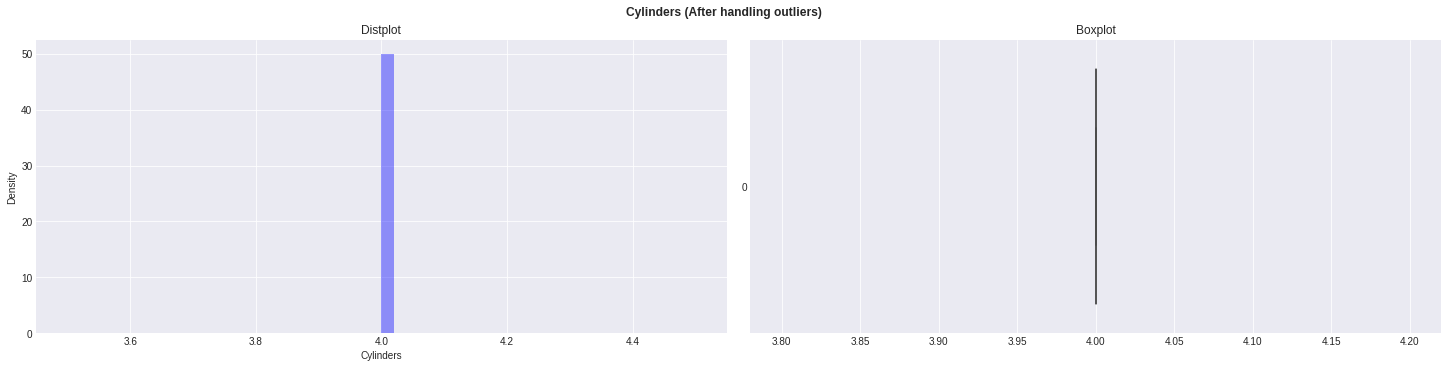

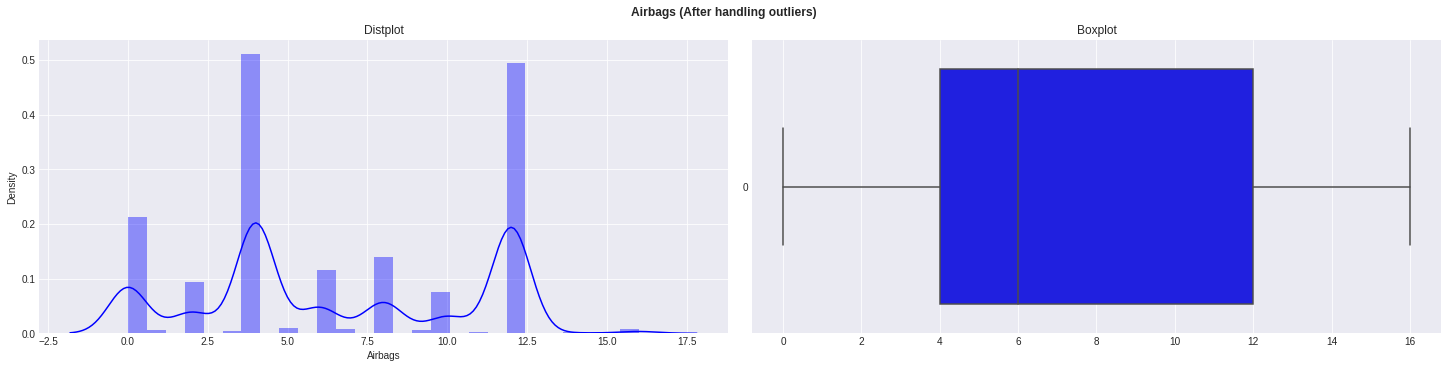

In [ ]:
for feature in numericals:
    fig, ax =plt.subplots(1,2, constrained_layout=True)
    fig.set_size_inches(20, 5)
    sns.distplot(df[feature], ax=ax[0],color='blue').set(title="Distplot")
    sns.boxplot(df[feature], ax=ax[1],color='blue',orient='h').set(title="Boxplot")
    plt.suptitle(f'{feature.title()} (After handling outliers)',weight='bold')
    fig.show()

Observasi:
* Pada kolom Price, Levy dan Mileage terjadi distribusi positive skewed.
* Variasi nilai tertentu pada kolom Prod. year, Engine volume dan Airbags sangat tinggi.
* Pada kolom Cylinders hanya mendapati satu jenis kategori.

In [ ]:
df[numericals].describe()

,Price,Levy,Prod. year,Engine volume,Mileage,Cylinders,Airbags
count,18924.000000,18924.000000,18924.000000,18924.000000,18924.000000,18924.0,18924.000000
mean,15886.559660,625.483249,2011.148753,2.238766,137503.106862,4.0,6.568379
std,13420.841661,520.625821,4.868423,0.682590,90883.265208,0.0,4.322323
min,1.000000,0.000000,2000.000000,0.750000,0.000000,4.0,0.000000
25%,5331.000000,0.000000,2009.000000,1.800000,70195.750000,4.0,4.000000
50%,13172.000000,642.000000,2012.000000,2.000000,126400.000000,4.0,6.000000
75%,22063.000000,917.000000,2015.000000,2.500000,189119.750000,4.0,12.000000
max,47161.000000,2292.500000,2020.000000,3.550000,367505.750000,4.0,16.000000


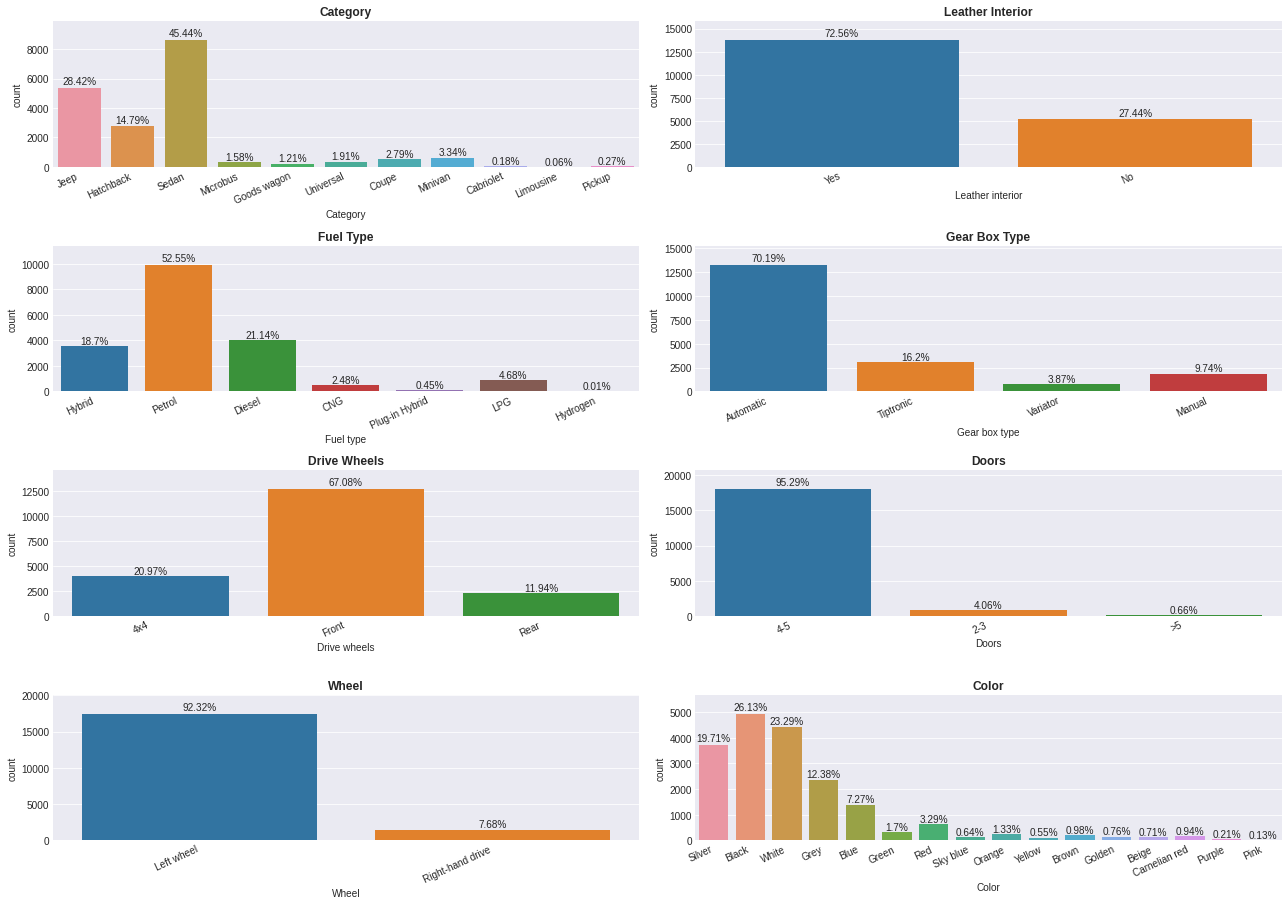

In [ ]:
# Defining a function to Notate the percent count of each value on the bars
def annot_percent(axes):
    for p in plot.patches:
        total = sum(p.get_height() for p in plot.patches)/100
        percent = round((p.get_height()/total),2)
        x = p.get_x() + p.get_width()/2
        y = p.get_height()*1.015
        plot.annotate(f'{percent}%', (x, y), ha='center', va='bottom')

new_categoricals=[feature for feature in categoricals if len(df[feature].unique())<50]
# Plot the bar plot 
r = int(len(new_categoricals)/2 +1)    # Defining r to autofit the number and size of plots

# Plotting the countplots for each target variable
plt.figure(figsize=(18,r*3))
for n,column in enumerate(new_categoricals):
    plot = plt.subplot(r,2,n+1)
    sns.countplot(x=df[column]).margins(y=0.15)
    plot.set_xticklabels(plot.get_xticklabels(), rotation=25, horizontalalignment='right')
    plt.title(f'{column.title()}',weight='bold')
    plt.tight_layout()
    annot_percent(plot)

Kesimpulan:
*  Pada kolom Category, sekitar 45.44% adalah sedan, 17.7% adalah hybrid, 14.79% adalah hatchback dan lainnya memiliki pangsa pasar dibawah 5%.
* Pada kolom Fueltype, 52.55% jenis bahan bakarnya di dominasi oleh petrol, 21.14% adalah diesel, 18.7% adalah hybrid dan jenis bahan bakar lain seperti CNG, LPG, dan Hidrogen, serta plug-in hybrid sangat rendah.
* 67.08% varian mobil menggunakan penggerak roda depan (Drive wheels).
* 92.32% varian mobil merupakan setir kiri (Left wheel).
* 72.56% varian mobil menggunakan kulit pada interiornya.
* 70.19% varian mobil menggunakan gear box type automatic.
* 95.29% varian mobil memiliki 4-5 pintu.
* Varian mobil terbanyak menggunakan warna (color) black 26.13%, white 23.29% dan silver 19.71%.


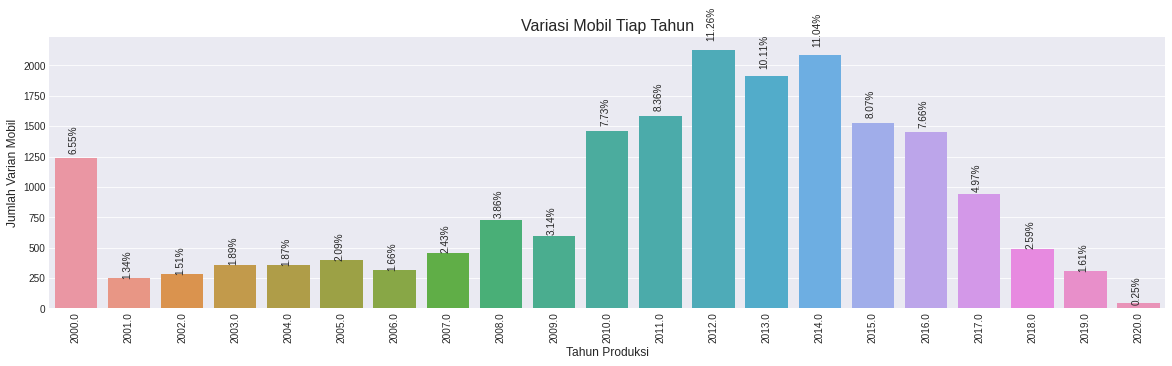

In [ ]:
# Create dataframe for model count and percentage
df1 = df.copy()  # Select the columns
df2 = df1.groupby(by= ['Prod. year'], as_index=False).count().sort_values(by='Prod. year', ascending=True)[['Prod. year','Price']]
df2 = df2.rename(columns={'Price': 'count'})
df2['Prod. year_per'] = round(df2['count']/sum(df2['count'])*100,2)

# Plot the bar chart 
plt.figure(figsize=(20,5))
plot = sns.barplot(x = 'Prod. year', y = 'count',  data = df2)
plt.title('Variasi Mobil Tiap Tahun', fontsize=16)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90, horizontalalignment='center')
plt.xlabel('Tahun Produksi', fontsize=12)
plt.ylabel('Jumlah Varian Mobil', fontsize=12)

# Annonate the bar plot
for i,p in enumerate(plot.patches):
        percentage = df2['Prod. year_per'][i]
        x = p.get_x() + p.get_width() / 3
        y = p.get_height()*1.04
        plot.annotate(f'{percentage}%', (x, y), size = 10, rotation=90)
plt.show()

Kesimpulan:
* Jumlah varian mobil tiap tahun bertahap meningkat dan kemudian menurun tajam sejak tahun 2015.
* Jumlah varian mobil terbaik di tahun 2012 (11.26%), 2013 (10.11%) dan 2014 (11.04%)

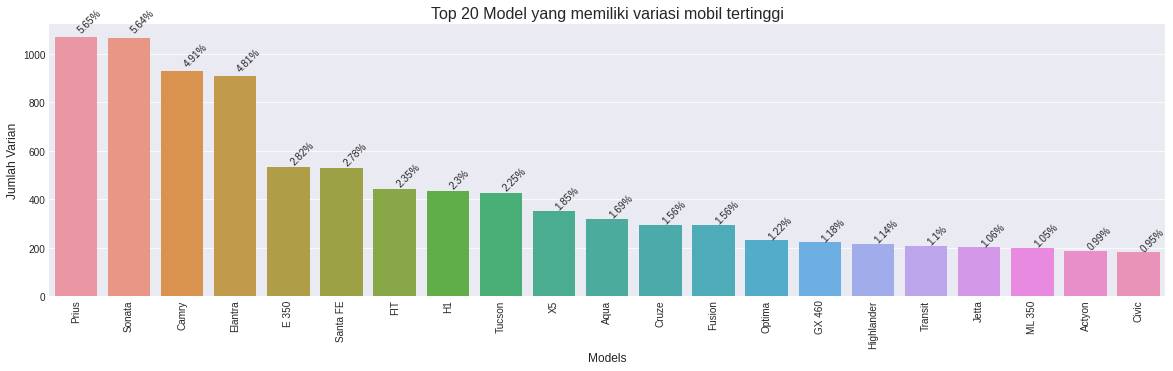

In [ ]:
# Create dataframe for model count and percentage
model_count_df = df['Model'].value_counts().to_frame().reset_index()
model_count_df['Model_per'] = round(model_count_df['Model']/sum(model_count_df['Model'])*100,2)

# Plot the bar chart 
plt.figure(figsize=(20,5))
plot = sns.barplot(x = 'index', y = 'Model',  data = model_count_df.loc[:20,:])
plot.set_xticklabels(plot.get_xticklabels(), rotation=90, horizontalalignment='center')
plt.title('Top 20 Model yang memiliki variasi mobil tertinggi', fontsize=16)
plt.xlabel('Models', fontsize=12)
plt.ylabel('Jumlah Varian', fontsize=12)

# Annonate the bar plot
for i,p in enumerate(plot.patches):
        percentage = model_count_df['Model_per'][i]
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()*1.02
        plot.annotate(f'{percentage}%', (x, y), size = 10, rotation=45)
plt.show()

Kesimpulan:
* Model Prius, Sonata, Camry, Elantra memiliki varian mobil tertinggi.
* Dari 1590 model, hanya keempatnya yang menyumbang 21% varian mobil.

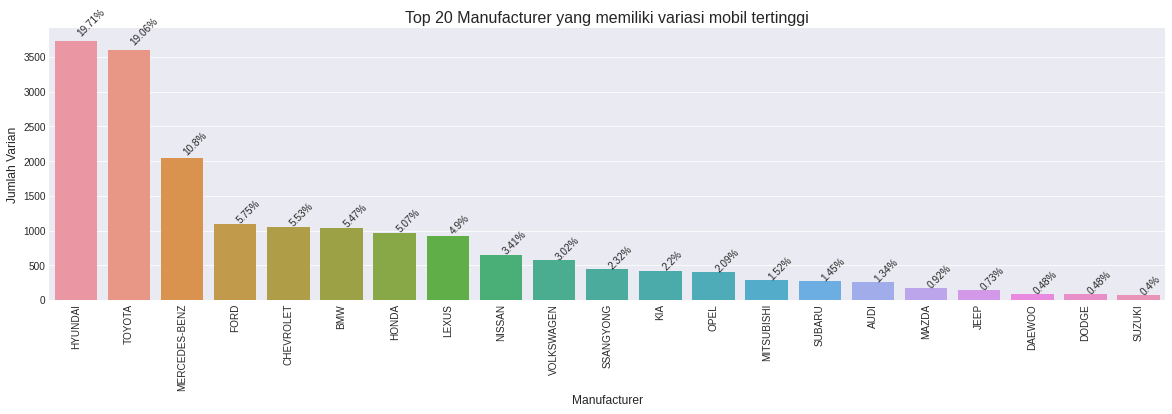

In [ ]:
# Create dataframe for model count and percentage
manufacturer_count_df = df['Manufacturer'].value_counts().to_frame().reset_index()
manufacturer_count_df['Manufacturer_per'] = round(manufacturer_count_df['Manufacturer']/sum(manufacturer_count_df['Manufacturer'])*100,2)

# Plot the bar chart 
plt.figure(figsize=(20,5))
plot = sns.barplot(x = 'index', y = 'Manufacturer',  data = manufacturer_count_df.loc[:20,:])
plot.set_xticklabels(plot.get_xticklabels(), rotation=90, horizontalalignment='center')
plt.title('Top 20 Manufacturer yang memiliki variasi mobil tertinggi', fontsize=16)
plt.xlabel('Manufacturer', fontsize=12)
plt.ylabel('Jumlah Varian', fontsize=12)

# Annonate the bar plot
for i,p in enumerate(plot.patches):
        percentage = manufacturer_count_df['Manufacturer_per'][i]
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()*1.02
        plot.annotate(f'{percentage}%', (x, y), size = 10, rotation=45)
plt.show()

Kesimpulan:
* Manufacturer Hyundai, Toyota, Mercedes-Benz memiliki varian mobil tertinggi.
* Dari 65 Manufacturer, hanya 3 Manufacturer ini yang memproduksi 48.8% varian mobil.

#Multivariate analysis

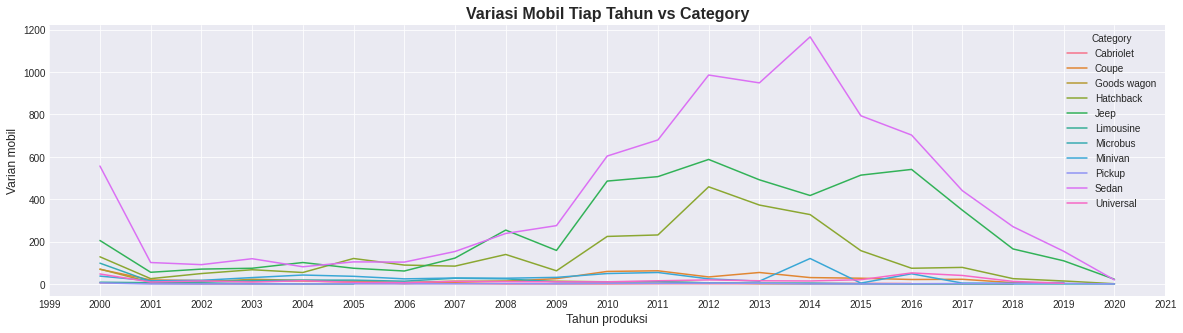

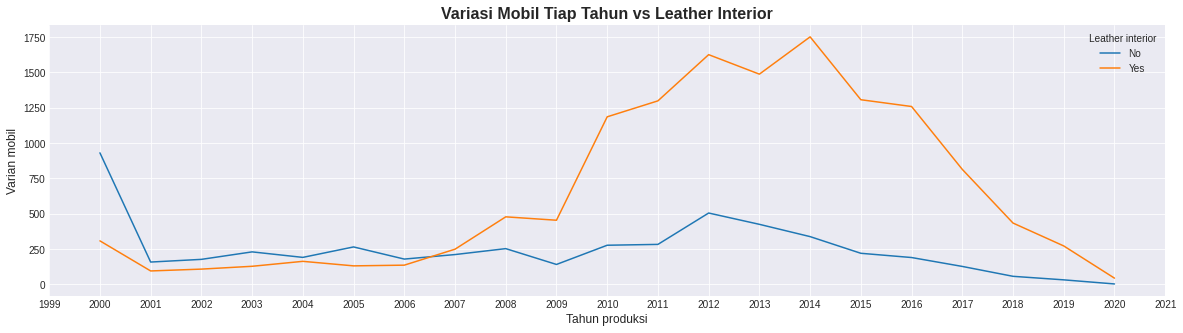

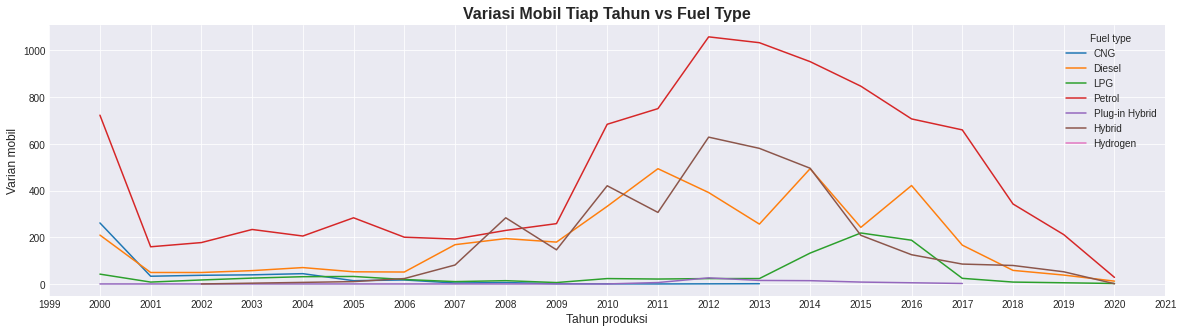

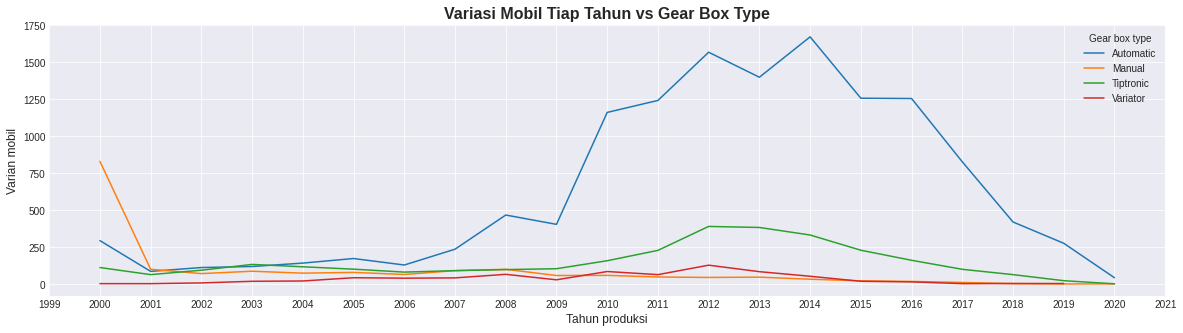

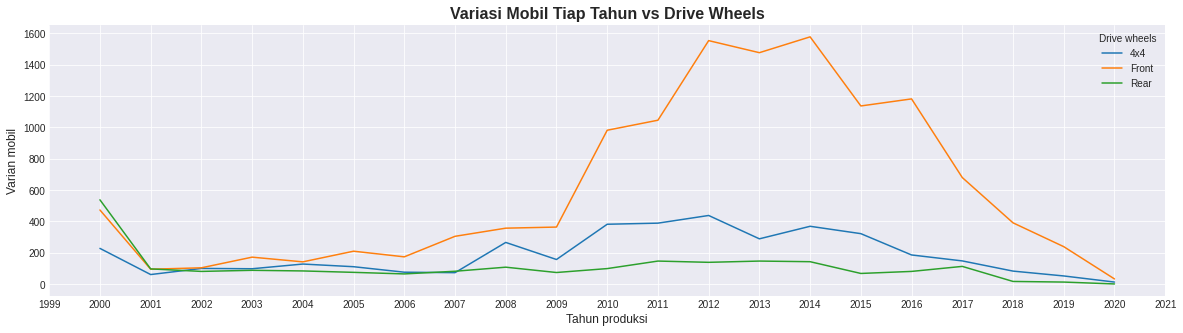

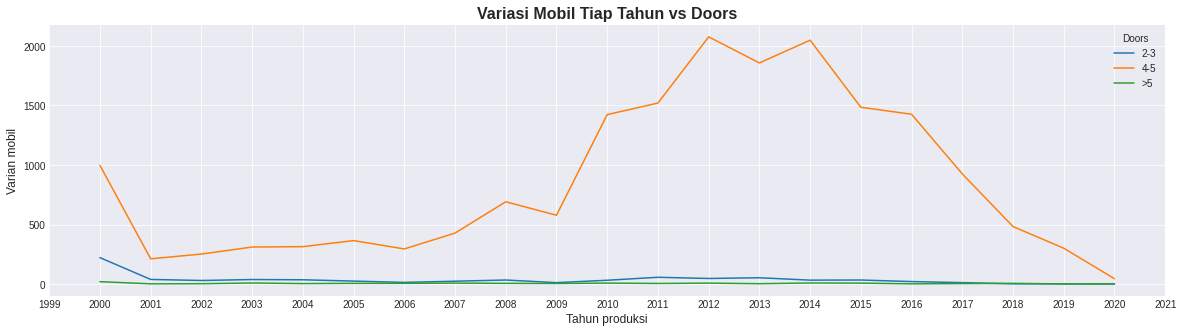

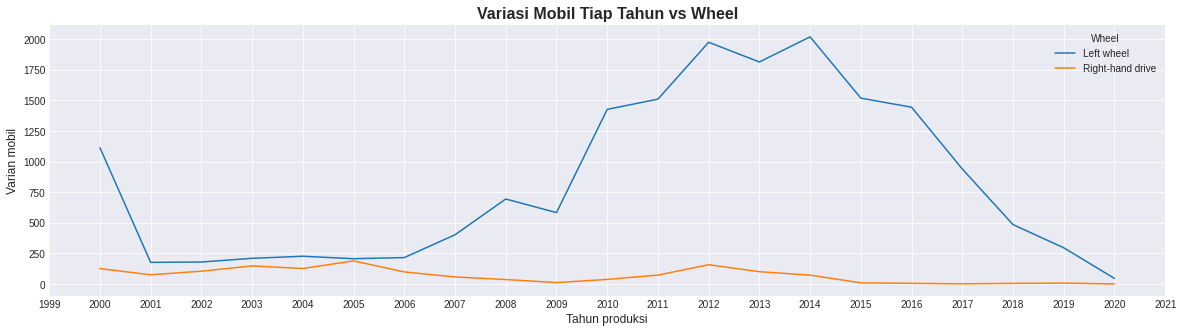

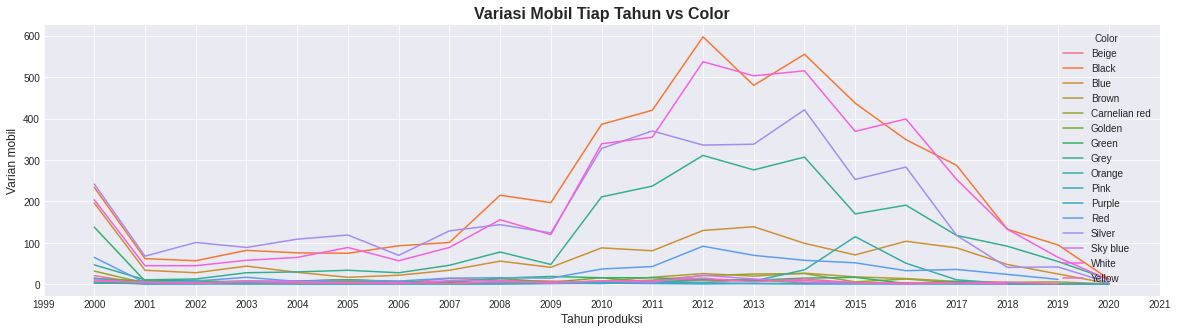

In [ ]:
for hue in new_categoricals:
    plt.figure(figsize=(20,5))
    df1 = df[['Prod. year',hue, 'Price']].groupby(by= ['Prod. year',hue], as_index=True).count().reset_index()
    plot = sns.lineplot(x = 'Prod. year', y = 'Price',  data = df1, hue = hue)
    plt.title(f'Variasi Mobil Tiap Tahun vs {hue.title()}', fontsize=16,weight='bold')
    plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
    plt.xlabel('Tahun produksi', fontsize=12)
    plt.ylabel('Varian mobil', fontsize=12)
    plt.show()

Kesimpulan:
* Category sedan mendominasi di tiap tahunnya, disusul oleh jeep dan hatchback.
* Sebagian besar varian mobil memiliki interior kulit(Leather interior).
* Jenis bahan bakar petrol selalu menjadi pilihan.
* Transmisi (Gearbox type) automatic mengalami kenaikan signifikan sekitar tahun 2007 - 2014, lalu mengalami penurunan sampai tahun 2020.
* Mobil dengan penggerak roda depan (Front),jumlah pintu (Doors) 4-5 dan setir kemudi sebelah kiri (Left Wheels) selalu mendominasi pasar.
* Warna (Color) Black, White dan Silver selalu menjadi pilihan di tiap tahunnya.

<Axes: >

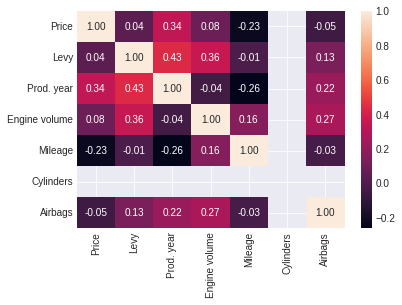

In [ ]:
# correlation heatmap
correlation = df.corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

* Tidak ada korelasi yang kuat antar variabel

#ML Model

In [ ]:
for col in df.select_dtypes('object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])


Konversikan semua kolom objek menjadi numerik dengan labelencoder (Karena Model ML tidak memahami kolom objek)

In [ ]:
df.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328.0,1399.0,32,1242,2010.0,4,1,2,3.5,186005.0,4.0,0,0,1,0,12,12.0
1,16621.0,1018.0,8,658,2011.0,4,0,5,3.0,192000.0,4.0,2,0,1,0,1,8.0
2,8467.0,0.0,21,684,2006.0,3,0,5,1.3,200000.0,4.0,3,1,1,1,1,2.0
3,3607.0,862.0,16,661,2011.0,4,1,2,2.5,168966.0,4.0,0,0,1,0,14,0.0
4,11726.0,446.0,21,684,2014.0,3,1,5,1.3,91901.0,4.0,0,1,1,0,12,4.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18924 entries, 0 to 19236
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             18924 non-null  float64
 1   Levy              18924 non-null  float64
 2   Manufacturer      18924 non-null  int64  
 3   Model             18924 non-null  int64  
 4   Prod. year        18924 non-null  float64
 5   Category          18924 non-null  int64  
 6   Leather interior  18924 non-null  int64  
 7   Fuel type         18924 non-null  int64  
 8   Engine volume     18924 non-null  float64
 9   Mileage           18924 non-null  float64
 10  Cylinders         18924 non-null  float64
 11  Gear box type     18924 non-null  int64  
 12  Drive wheels      18924 non-null  int64  
 13  Doors             18924 non-null  int64  
 14  Wheel             18924 non-null  int64  
 15  Color             18924 non-null  int64  
 16  Airbags           18924 non-null  float6

<Axes: >

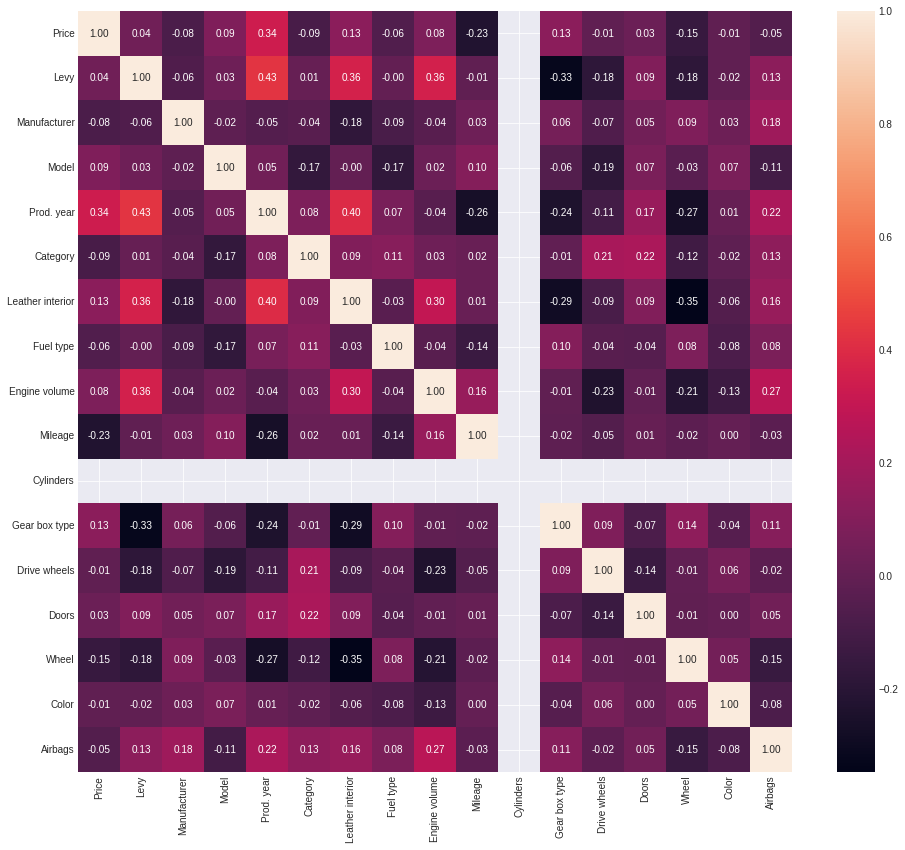

In [ ]:
plt.figure(figsize=(16, 14))
sns.heatmap(df.corr(), cbar=True, annot=True, fmt='.2f')

In [ ]:
# Split the data

X = df.drop('Price',axis=1).values
y = df['Price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print("Shape of X_train :", X_train.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of X_test :", X_test.shape)
print("Shape of y_test :", y_test.shape)

Shape of X_train : (15139, 16)
Shape of y_train : (15139,)
Shape of X_test : (3785, 16)
Shape of y_test : (3785,)


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

##LinearRegression

In [ ]:
lr =  LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_pred_train = lr.predict(X_train)

In [ ]:
print('R2 for training data is {}'.format(r2_score(y_train, lr_pred_train)))
print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_train, lr_pred_train))))
print('MAE for training data is {}'.format(mean_absolute_error(y_train, lr_pred_train)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_train, lr_pred_train)))
print('-'*80)

print('R2 for test data: ',r2_score(y_test, lr_pred)) 
print('RMSE for test data: ', np.sqrt(mean_squared_error(y_test, lr_pred)))  
print('MAE for test data: ', mean_absolute_error(y_test,lr_pred))  
print('MAPE for test data: ', mean_absolute_percentage_error(y_test, lr_pred))  

R2 for training data is 0.2797432428560058
RMSE for training data is 11376.413987717842
MAE for training data is 8879.199963498804
MAPE for training data is 15.688970982665985
--------------------------------------------------------------------------------
R2 for test data:  0.2700074719246315
RMSE for test data:  11519.58761663288
MAE for test data:  9026.749694890937
MAPE for test data:  15.89596836404588


##DecisionTree

In [ ]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_pred_train = dt.predict(X_train)

In [ ]:
print('R2 for training data is {}'.format(r2_score(y_train, dt_pred_train)))
print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_train, dt_pred_train))))
print('MAE for training data is {}'.format(mean_absolute_error(y_train, dt_pred_train)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_train, dt_pred_train)))
print('-'*80)

print('R2 for test data: ',r2_score(y_test, dt_pred)) 
print('RMSE for test data: ', np.sqrt(mean_squared_error(y_test, dt_pred)))  
print('MAE for test data: ', mean_absolute_error(y_test,dt_pred))  
print('MAPE for test data: ', mean_absolute_percentage_error(y_test, dt_pred))

R2 for training data is 0.9864573070576124
RMSE for training data is 1559.9627671170276
MAE for training data is 194.12580908074884
MAPE for training data is 0.11107676427877931
--------------------------------------------------------------------------------
R2 for test data:  0.5987732920826432
RMSE for test data:  8540.290470395395
MAE for test data:  4578.218084208344
MAPE for test data:  10.389929029121948


##RandomForest

In [ ]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train) 
rf_pred = rf.predict(X_test)
rf_pred_train = dt.predict(X_train)

In [ ]:
print('R2 for training data is {}'.format(r2_score(y_train, rf_pred_train)))
print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_train, rf_pred_train))))
print('MAE for training data is {}'.format(mean_absolute_error(y_train, rf_pred_train)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_train, rf_pred_train)))
print('-'*80)

print('R2 for test data: ',r2_score(y_test, rf_pred)) 
print('RMSE for test data: ', np.sqrt(mean_squared_error(y_test, rf_pred)))  
print('MAE for test data: ', mean_absolute_error(y_test,rf_pred))  
print('MAPE for test data: ', mean_absolute_percentage_error(y_test, rf_pred))

R2 for training data is 0.9864573070576124
RMSE for training data is 1559.9627671170276
MAE for training data is 194.12580908074884
MAPE for training data is 0.11107676427877931
--------------------------------------------------------------------------------
R2 for test data:  0.7827414054916718
RMSE for test data:  6284.434551649494
MAE for test data:  3661.5236701796857
MAPE for test data:  8.593519674105005


## GradientBoosting

In [ ]:
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train) 
gb_pred = gb.predict(X_test)
gb_pred_train = gb.predict(X_train)

In [ ]:
print('R2 for training data is {}'.format(r2_score(y_train, gb_pred_train)))
print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_train, gb_pred_train))))
print('MAE for training data is {}'.format(mean_absolute_error(y_train, gb_pred_train)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_train, gb_pred_train)))
print('-'*80)

print('R2 for test data: ',r2_score(y_test, gb_pred)) 
print('RMSE for test data: ', np.sqrt(mean_squared_error(y_test, gb_pred)))  
print('MAE for test data: ', mean_absolute_error(y_test,gb_pred))  
print('MAPE for test data: ', mean_absolute_percentage_error(y_test, gb_pred))

R2 for training data is 0.6411801625060579
RMSE for training data is 8029.711459366156
MAE for training data is 5767.231010302907
MAPE for training data is 12.458168093870661
--------------------------------------------------------------------------------
R2 for test data:  0.6188113921125756
RMSE for test data:  8324.299193839099
MAE for test data:  5984.258575504288
MAPE for test data:  11.931053110959429


## XGB

In [ ]:
xgb = XGBRegressor()
xgb.fit(X_train, y_train) 
xgb_pred = xgb.predict(X_test)
xgb_pred_train = xgb.predict(X_train)

In [ ]:
print('R2 for training data is {}'.format(r2_score(y_train, xgb_pred_train)))
print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_train, xgb_pred_train))))
print('MAE for training data is {}'.format(mean_absolute_error(y_train, xgb_pred_train)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_train, xgb_pred_train)))
print('-'*80)

print('R2 for test data: ',r2_score(y_test, xgb_pred)) 
print('RMSE for test data: ', np.sqrt(mean_squared_error(y_test, xgb_pred)))  
print('MAE for test data: ', mean_absolute_error(y_test,xgb_pred))  
print('MAPE for test data: ', mean_absolute_percentage_error(y_test, xgb_pred))

R2 for training data is 0.8924581226305887
RMSE for training data is 4395.927526855782
MAE for training data is 2921.0184103465394
MAPE for training data is 6.812820169094101
--------------------------------------------------------------------------------
R2 for test data:  0.7625889201962155
RMSE for test data:  6569.437973327652
MAE for test data:  4195.05671294904
MAPE for test data:  9.601582096594367


## KNN

In [ ]:
kn = KNeighborsRegressor()
kn.fit(X_train, y_train) 
kn_pred = kn.predict(X_test)
kn_pred_train = kn.predict(X_train)

In [ ]:
print('R2 for training data is {}'.format(r2_score(y_train, kn_pred_train)))
print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_train, kn_pred_train))))
print('MAE for training data is {}'.format(mean_absolute_error(y_train, kn_pred_train)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_train, kn_pred_train)))
print('-'*80)

print('R2 for test data: ',r2_score(y_test, kn_pred)) 
print('RMSE for test data: ', np.sqrt(mean_squared_error(y_test, kn_pred)))  
print('MAE for test data: ', mean_absolute_error(y_test,kn_pred))  
print('MAPE for test data: ', mean_absolute_percentage_error(y_test, kn_pred))

R2 for training data is 0.7979269768710725
RMSE for training data is 6025.8162795835615
MAE for training data is 3603.5078538873113
MAPE for training data is 7.880314468315219
--------------------------------------------------------------------------------
R2 for test data:  0.6853431826697646
RMSE for test data:  7563.038264055439
MAE for test data:  4566.82177014531
MAPE for test data:  10.886994731957547


In [ ]:
%%time
test_score=[]
train_score=[]
modell=[]


pipeline_lr = Pipeline([('lr', LinearRegression())])
pipeline_dt = Pipeline([('dt', DecisionTreeRegressor())])
pipelines_rf = Pipeline([('rf', RandomForestRegressor())])
pipelines_gb = Pipeline([('gb', GradientBoostingRegressor())])
pipelines_xgb = Pipeline([('xgb', XGBRegressor())])
pipelines_knn = Pipeline([('knn', KNeighborsRegressor())])

pipelines = [pipeline_lr,pipeline_dt,pipelines_rf,pipelines_gb,pipelines_xgb,pipelines_knn]

pipe_dict = {0: 'Linear Regression',
             1: 'DecisionTree Regression',
             2: 'Random Forest Regression',
             3: 'Gradient Boost',
             4: 'Xgboost',
             5: 'K-Neighbors Regression'}

for pipe in pipelines:
    pipe.fit(X_train, y_train)
    
for i, model in enumerate(pipelines):
    test_score.append(model.score(X_test, y_test))
    train_score.append(model.score(X_train, y_train))
    modell.append(pipe_dict[i])

CPU times: user 15.7 s, sys: 264 ms, total: 16 s
Wall time: 13.4 s


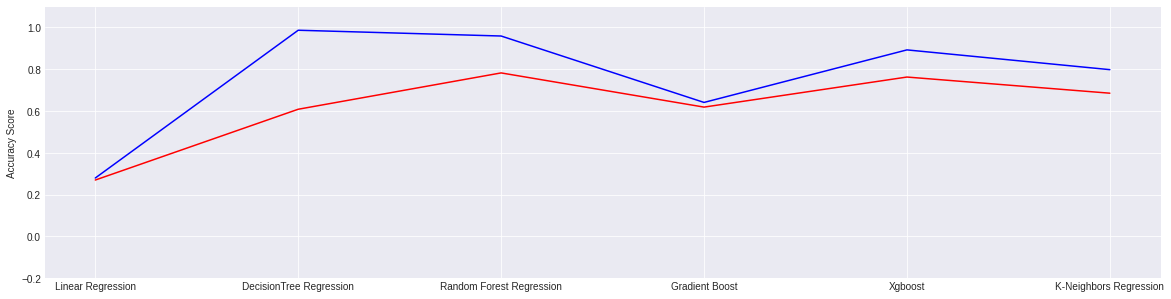

In [ ]:
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(20, 5))
plt.plot(modell,test_score, color='red')
plt.plot(modell,train_score, color='blue')
plt.ylim(-0.2, 1.1)
plt.ylabel("Accuracy Score")
plt.show()

In [ ]:
for i, model in enumerate(pipelines):
    print(f'{pipe_dict[i]} has test accuracy: {round(model.score(X_test, y_test),3)}')
    print(f'{pipe_dict[i]} has train accuracy: {round(model.score(X_train, y_train),3)}')
    print('')

Linear Regression has test accuracy: 0.27
Linear Regression has train accuracy: 0.28

DecisionTree Regression has test accuracy: 0.609
DecisionTree Regression has train accuracy: 0.986

Random Forest Regression has test accuracy: 0.782
Random Forest Regression has train accuracy: 0.959

Gradient Boost has test accuracy: 0.619
Gradient Boost has train accuracy: 0.641

Xgboost has test accuracy: 0.763
Xgboost has train accuracy: 0.892

K-Neighbors Regression has test accuracy: 0.685
K-Neighbors Regression has train accuracy: 0.798



DecisionTree dan RandomForest dengan akurasi terbaik akan kita tuning

#Hyperparameter Tuning

##DecisionTree Regressor

In [ ]:
%%time
dt_grid = GridSearchCV(dt,
                  param_grid = {'max_depth': range(1, 11),
                                'min_samples_split': range(10, 60, 10)},
                  cv=5,
                  scoring='r2')
dt_grid.fit(X_train, y_train)

print(dt_grid.best_params_)
print(-dt_grid.best_score_)

{'max_depth': 10, 'min_samples_split': 30}
-0.6474068378666368
CPU times: user 7.65 s, sys: 5.2 ms, total: 7.65 s
Wall time: 7.7 s


In [ ]:
cv_dt_result = pd.DataFrame(dt_grid.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_dt_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
47,"{'max_depth': 10, 'min_samples_split': 30}",0.647407,1
49,"{'max_depth': 10, 'min_samples_split': 50}",0.647090,2
48,"{'max_depth': 10, 'min_samples_split': 40}",0.643573,3
46,"{'max_depth': 10, 'min_samples_split': 20}",0.642229,4
45,"{'max_depth': 10, 'min_samples_split': 10}",0.636713,5
44,"{'max_depth': 9, 'min_samples_split': 50}",0.635428,6
42,"{'max_depth': 9, 'min_samples_split': 30}",0.633611,7
43,"{'max_depth': 9, 'min_samples_split': 40}",0.631576,8
41,"{'max_depth': 9, 'min_samples_split': 20}",0.628656,9
40,"{'max_depth': 9, 'min_samples_split': 10}",0.626440,10


In [ ]:
dth_pred_train = dt_grid.best_estimator_.predict(X_train)
dth_pred_test = dt_grid.best_estimator_.predict(X_test)


print('R2 for training data is {}'.format(r2_score(y_train, dth_pred_train)))
print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_train,dth_pred_train))))
print('MAE for training data is {}'.format(mean_absolute_error(y_train, dth_pred_train)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_train, dth_pred_train)))
print('-'*80)

print('R2 for test data: ',r2_score(y_test, dth_pred_test))  
print('RMSE for test data: ', np.sqrt(mean_squared_error(y_test, dth_pred_test)))  
print('MAE for test data: ', mean_absolute_error(y_test, dth_pred_test)) 
print('MAPE for test data: ', mean_absolute_percentage_error(y_test, dth_pred_test))  

R2 for training data is 0.7422316203069674
RMSE for training data is 6805.75855557173
MAE for training data is 4519.665986407796
MAPE for training data is 10.557982821407617
--------------------------------------------------------------------------------
R2 for test data:  0.6458305936744684
RMSE for test data:  8023.858227729048
MAE for test data:  5217.898732858934
MAPE for test data:  10.03829094867914


##RandomForest Regressor

In [ ]:
%%time
rf_grid = GridSearchCV(rf, 
                       param_grid = {'n_estimators': (5,7,9,11,13,15),
                                     'max_depth':(4,8,10,12,14,16),
                                     'random_state':(26,42,50,100)},
                      cv=5, scoring='r2')
rf_grid.fit(X_train, y_train)

print(rf_grid.best_params_)
print(-rf_grid.best_score_)

{'max_depth': 16, 'n_estimators': 15, 'random_state': 100}
-0.7622227784221988
CPU times: user 4min 17s, sys: 429 ms, total: 4min 18s
Wall time: 4min 19s


In [ ]:
cv_rf_result = pd.DataFrame(rf_grid.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_rf_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
143,"{'max_depth': 16, 'n_estimators': 15, 'random_...",0.762223,1
142,"{'max_depth': 16, 'n_estimators': 15, 'random_...",0.761696,2
141,"{'max_depth': 16, 'n_estimators': 15, 'random_...",0.760564,3
139,"{'max_depth': 16, 'n_estimators': 13, 'random_...",0.759934,4
138,"{'max_depth': 16, 'n_estimators': 13, 'random_...",0.759322,5
...,...,...,...
4,"{'max_depth': 4, 'n_estimators': 7, 'random_st...",0.433507,140
13,"{'max_depth': 4, 'n_estimators': 11, 'random_s...",0.433286,141
9,"{'max_depth': 4, 'n_estimators': 9, 'random_st...",0.432590,142
1,"{'max_depth': 4, 'n_estimators': 5, 'random_st...",0.432574,143


In [ ]:
rfh_pred_train = rf_grid.best_estimator_.predict(X_train)
rfh_pred_test = rf_grid.best_estimator_.predict(X_test)


print('R2 for training data is {}'.format(r2_score(y_train, rfh_pred_train)))
print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_train, rfh_pred_train))))
print('MAE for training data is {}'.format(mean_absolute_error(y_train, rfh_pred_train)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_train, rfh_pred_train)))
print('-'*80)

print('R2 for test data: ',r2_score(y_test, rfh_pred_test))  
print('RMSE for test data: ', np.sqrt(mean_squared_error(y_test, rfh_pred_test)))  
print('MAE for test data: ', mean_absolute_error(y_test, rfh_pred_test)) 
print('MAPE for test data: ', mean_absolute_percentage_error(y_test, rfh_pred_test))  

R2 for training data is 0.9309497567953512
RMSE for training data is 3522.4458319107052
MAE for training data is 2169.798139732075
MAPE for training data is 5.232615853345725
--------------------------------------------------------------------------------
R2 for test data:  0.7689749781997908
RMSE for test data:  6480.480897837721
MAE for test data:  3941.175780248958
MAPE for test data:  8.78573136393921


# Feature Importance RandomForest

In [ ]:
importances = rf.feature_importances_
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances)[::-1]
 
feat_labels = df.columns[1:]
 
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[sorted_indices[f]],
                            importances[sorted_indices[f]]))

 1) Prod. year                     0.223828
 2) Airbags                        0.141682
 3) Mileage                        0.111486
 4) Engine volume                  0.102590
 5) Fuel type                      0.089799
 6) Levy                           0.075870
 7) Gear box type                  0.073620
 8) Model                          0.060604
 9) Manufacturer                   0.038228
10) Color                          0.027147
11) Drive wheels                   0.018970
12) Category                       0.016101
13) Leather interior               0.015061
14) Doors                          0.002888
15) Wheel                          0.002126
16) Cylinders                      0.000000


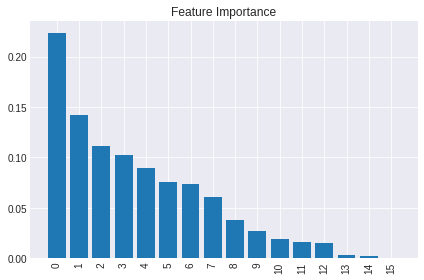

In [ ]:
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]),rotation=90)
plt.tight_layout()
plt.show()

Prod. year (tahun produksi) sangat mempengaruhi harga mobil, sedangkan jumlah cylinders tidak berpengaruh sama sekali dengan harga mobil